### Снижение размерности данных

##### 1. Обучить любую модель классификации на датасете IRIS до применения PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [62]:
# ноль циклов
def knn(x_train, y_train, x_test, k):
    
    # расчет расстояний от классифицируемых объектов до
    # объектов обучающей выборки
    distances = np.sqrt(np.sum(np.square(x_test[:, np.newaxis] - x_train), axis=2))
                
    answers = []    
    for distance in distances:
        # Записываем в список значение расстояния и ответа на объекте обучающей выборки
        test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 1
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1/i
            i += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [63]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [64]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

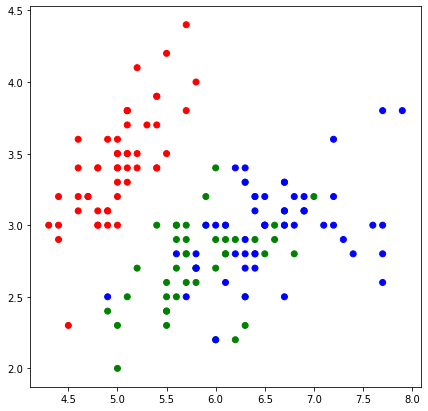

In [65]:
# Загрузим датасет из sklearn
X, y = datasets.load_iris(return_X_y=True)

# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Визуализируем её
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

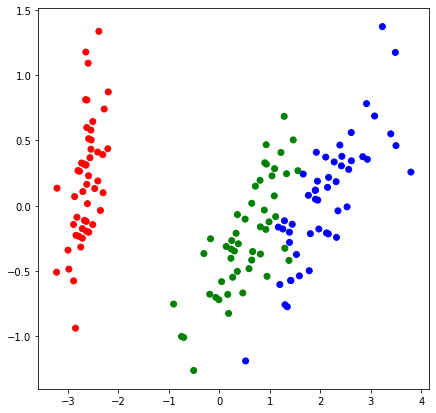

In [66]:
# Применим PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Разделим выборку на обучающую и тестовую
X_pca_train, X_pca_test, y_pca_train, y_pca_test = model_selection.train_test_split(X_pca, y, test_size=0.2, random_state=1, stratify=y)

# Визуализируем её
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap);

In [67]:
k = 10

y_train_pred = knn(X_train, y_train, X_train, k)
print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_train_pred, y_train):.3f}')
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Точность алгоритма на обучающей выборке при k = 10: 0.992
Точность алгоритма на тестовой выборке при k = 10: 0.967
(58800, 2)


ValueError: operands could not be broadcast together with shapes (58800,1,2) (120,4) 

Точность алгоритма на обучающей выборке при k = 10: 0.992
Точность алгоритма на тестовой выборке при k = 10: 0.967
(105083, 2)


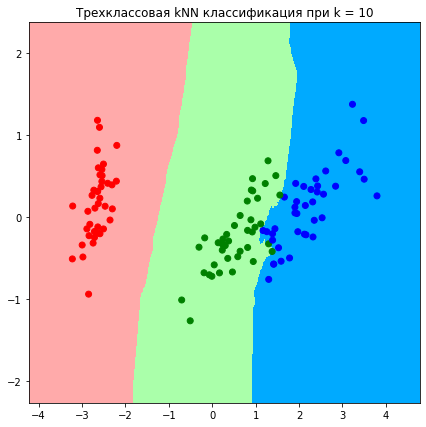

In [68]:
# после PCA
y_pca_train_pred = knn(X_pca_train, y_pca_train, X_pca_train, k)
print(f'Точность алгоритма на обучающей выборке при k = {k}: {accuracy(y_pca_train_pred, y_pca_train):.3f}')
y_pca_pred = knn(X_pca_train, y_pca_train, X_pca_test, k)
print(f'Точность алгоритма на тестовой выборке при k = {k}: {accuracy(y_pca_pred, y_pca_test):.3f}')
get_graph(X_pca_train, y_pca_train, k)

PCA не оказал существенного влияния на модель классификации

##### 2. *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [ ]:
def pca_svd(X, n_elements):
    # Произведём сингулярное разложение
    U, s, W = np.linalg.svd(X)
    print('s:', s)
    V = W.T  # Транспонируем матрицу W
    # s - список диагональных элементов, его нужно привести к виду диагональной матрицы
    Sigma = np.zeros_like(X, dtype=float)
    Sigma[np.diag_indices(min(X.shape))] = s
    # Перестроим матрицу
    Sigma = Sigma[:,:n_elements]
    V = V[:,:n_elements]
    B = U @ (Sigma @ V.T)
    # Переведем новую матрицу в новое n_elements-мерное пространство
    U, s, W = np.linalg.svd(B)
    return (W @ B.T)[:n_elements].T